# MATH 210 Introduction to Mathematical Computing

## October 17, 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Fresnel Integrals

Consider the [Fresnel integral](https://en.wikipedia.org/wiki/Fresnel_integral)

$$
S(t) = \int_0^t \sin(x^2) dx
$$

Let's approximate the integral using the trapezoid method. Find a value $N$ such that

$$
\left| \, S(1) - T_N(f) \, \right| \leq 0.001
$$

Using the error formula we found

$$
N \geq 13.8
$$

In [2]:
N = 14; a = 0; b = 1;
x = np.linspace(a,b,N+1)
y = np.sin(x**2)
dx = (b-a)/N
TN = np.sum(y[1:] + y[:N])/2*dx
print(TN)

0.310728264183


Compare to the SciPy function `scipy.special.fresnel`.

In [3]:
from scipy.special import fresnel

Note that we have to scale the SciPy implementation of the Fresnel integral to get the same result:

In [4]:
np.sqrt(np.pi/2)*fresnel(np.sqrt(2/np.pi))[0]

0.31026830172338116

## Example: Natural Logs

Use the trapezoid method to approximate the integral

$$
\int_2^e \ln \left( \ln(x) \right) \, dx
$$

Let's choose (arbitrarily) $N=14$.

In [5]:
N = 14; a = 2; b = np.e;
x = np.linspace(a,b,N+1)
y = np.log(np.log(x))
dx = (b-a)/N
TN = np.sum(y[1:] + y[:N])/2*dx
print(TN)

-0.117005716102


We can use the error formula to estimate the error. We compute the second derivative

$$
\frac{d^2}{dx^2} \ln \left( \ln(x) \right) = -\frac{\ln(x) + 1}{(x\ln(x))^2}
$$

and we plot $\left| f''(x) \right|$.

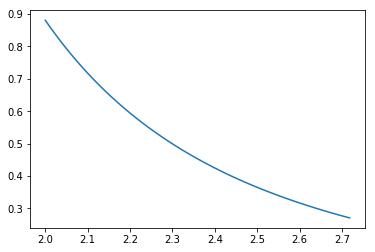

In [6]:
x = np.linspace(2,np.e,100)
f = np.abs(-(np.log(x) + 1)/(np.log(x)*x)**2)
plt.plot(x,f)
plt.show()

Therefore $\left| f''(x) \right| \leq 0.9$ for $x \in [2,e]$ and so the error is:

In [7]:
error = .9*(np.e - 2)**3/(12*14**2)
print(error)

0.00014180444047664882
